# Background
Perusahaan teknologi transportasi yang berfokus pada urban mobility analytics untuk meningkatkan kualitas layanan taksi di kota besar seperti New York. Untuk mencapai tujuan tersebut, perusahaan mengumpulkan dan menyediakan dataset perjalanan taksi yang sangat komprehensif, mencakup informasi tentang tarif, pajak, vendor, lokasi penjemputan, durasi perjalanan, hingga metode pembayaran.

# Problem Statement
Untuk memperoleh gambaran yang lebih komprehensif terkait dinamika layanan taksi, analisis terhadap pola permintaan pelanggan dan perilaku perjalanan di setiap borough menjadi langkah penting bagi perusahaan. Pemahaman mengenai kapan dan di mana permintaan tertinggi terjadi, bagaimana panjang perjalanan bervariasi antar wilayah, serta bagaimana preferensi pembayaran dan perilaku tipping berbeda di setiap borough, dapat memberikan wawasan mendalam mengenai kebutuhan operasional di lapangan. Selain itu, perbedaan karakteristik demografis dan geografis antar borough juga berpotensi menciptakan pola permintaan yang unik, sehingga berdampak langsung pada strategi alokasi armada dan kualitas layanan yang diberikan.

Sebagai seorang Data Analyst, berikut area permasalahan yang akan dijawab:

**Customer Demand & Behavior Patterns: Bagaimana pola kebutuhan layanan taksi di berbagai borough (Brooklyn, Manhattan, dll) dapat membantu distribusi armada dan peningkatan layanan?**

# Data

In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from scipy.stats import normaltest, chi2_contingency, mannwhitneyu, ttest_ind
import missingno as msno

import warnings
warnings.filterwarnings("ignore")

In [10]:
df=pd.read_csv('NYC TLC Trip Record.csv')
display(df.head(),df.tail())

,VendorID,lpep_pickup_datetime,lpep_dropoff_datetime,store_and_fwd_flag,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,extra,mta_tax,tip_amount,tolls_amount,ehail_fee,improvement_surcharge,total_amount,payment_type,trip_type,congestion_surcharge
0,2,2023-01-01 00:26:10,2023-01-01 00:37:11,N,1.0,166,143,1.0,2.58,14.9,1.0,0.5,4.03,0.0,NaN,1.0,24.18,1.0,1.0,2.75
1,2,2023-01-01 00:51:03,2023-01-01 00:57:49,N,1.0,24,43,1.0,1.81,10.7,1.0,0.5,2.64,0.0,NaN,1.0,15.84,1.0,1.0,0.00
2,2,2023-01-01 00:35:12,2023-01-01 00:41:32,N,1.0,223,179,1.0,0.00,7.2,1.0,0.5,1.94,0.0,NaN,1.0,11.64,1.0,1.0,0.00
3,1,2023-01-01 00:13:14,2023-01-01 00:19:03,N,1.0,41,238,1.0,1.30,6.5,0.5,1.5,1.70,0.0,NaN,1.0,10.20,1.0,1.0,0.00
4,1,2023-01-01 00:33:04,2023-01-01 00:39:02,N,1.0,41,74,1.0,1.10,6.0,0.5,1.5,0.00,0.0,NaN,1.0,8.00,1.0,1.0,0.00


,VendorID,lpep_pickup_datetime,lpep_dropoff_datetime,store_and_fwd_flag,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,extra,mta_tax,tip_amount,tolls_amount,ehail_fee,improvement_surcharge,total_amount,payment_type,trip_type,congestion_surcharge
68206,2,2023-01-31 22:29:00,2023-01-31 22:42:00,NaN,NaN,49,62,NaN,4070.82,15.70,0.0,0.0,0.00,0.0,NaN,1.0,16.70,NaN,NaN,NaN
68207,2,2023-01-31 22:40:00,2023-01-31 22:48:00,NaN,NaN,10,205,NaN,2.14,4.41,0.0,0.0,0.00,0.0,NaN,1.0,5.41,NaN,NaN,NaN
68208,2,2023-01-31 23:46:00,2023-02-01 00:02:00,NaN,NaN,66,37,NaN,3.44,16.53,0.0,0.0,3.51,0.0,NaN,1.0,21.04,NaN,NaN,NaN
68209,2,2023-01-31 23:01:00,2023-01-31 23:19:00,NaN,NaN,225,189,NaN,3.03,14.98,0.0,0.0,3.20,0.0,NaN,1.0,19.18,NaN,NaN,NaN
68210,2,2023-01-31 23:51:00,2023-02-01 00:07:00,NaN,NaN,256,140,NaN,5.82,23.65,0.0,0.0,2.00,0.0,NaN,1.0,29.40,NaN,NaN,NaN


Dataset di atas berisikan catatan perjalanan taksi di New York City dari perusahaan NYC Taxi & Limousine Commission dalam periode tertentu. Terdapat 20 kolom yang tersedia pada dataset tersebut, antara lain:
1. VendorID     : Kode yang menunjukan penyedia layanan taksi yang mencatat perjalanan (CMT & Verifone).
2. Ipep_Pickup_Datetime : Tanggal dan waktu ketika meteran taksi mulai berjalan.
3. lpep_dropoff_datetime    : Tanggal dan waktu ketika meteran dihentikan (pengantaran selesai).
4. Passenger_count      : Jumlah penumpang dalam perjalanan (diinput oleh pengemudi).
5. Trip_distance        : Jarak perjalanan dalam mil yang dicatat oleh taximeter.
6. PULocationID         : Zona taksi (TLC Taxi Zone) tempat penjemputan terjadi.
7. DOLocationID         : Zona taksi tempat penumpang diantar/diturunkan.
8. RateCodeID           : Kode tarif yang berlaku untuk perjalanan. (Standard, JFK, Newark, Nassau / Westchester, Negotiated Fare & Group Ride)
9. Store_and_fwd_flag   : Menandakan apakah data perjalanan tersimpan sementara di alat taksi sebelum dikirim ke server.
10. Payment_type        : Metode pembayaran yang digunakan penumpang. (Cash, Credit Card, No Charge, Dispute & Unknown)
11. Fare_Amount       : Tarif dasar perjalanan berdasarkan waktu dan jarak (belum termasuk pajak & surcharge).
12. Extra               : Surcharge tambahan seperti biaya rush hour atau overnight.
13. MTA_Tax             : Pajak MTA sebesar $0.50 yang otomatis dikenakan.
14. Improvement_surcharge: Biaya tambahan $0.30 yang dikenakan pada perjalanan (surcharge perbaikan).
15. Tip_amount          : Jumlah tip (hanya dicatat otomatis jika pembayaran melakukan CC).
16. Tolls_Amount        : Total biaya tol yang dibayar selama perjalanan.
17. Total_Amount        : Total biaya yang ditagihkan kepada penumpang (di luar tip cash).
18. Trip_Type           : Jenis perjalanan. (Street-hail atau Dispatch)
19. e-Hail Fee          : biaya tambahan untuk layana e-hail.
20. Congestion_Surchare : biaya tambahan kemacetan.

## Exploration & Cleansing Data



### Data Exploration
Sebelum melakukan tahap analisis, penting bagi kita untuk memahami terlebih dahulu isi dari dataset melalui proses data understanding. Tahap ini bertujuan untuk mengamati pola, menemukan kejanggalan, serta mengidentifikasi potensi anomali yang mungkin memengaruhi kualitas analisis. Temuan anomali tersebut nantinya akan ditangani pada fase data cleaning, dengan setiap langkah perbaikan diberikan alasan yang jelas, baik berdasarkan pengetahuan konteks (domain knowledge) maupun pertimbangan statistik.

Sebagai langkah awal, kita akan meninjau lebih dekat karakteristik awal dari dataset NYC TLC Trip Record.

In [16]:
print(f'Jumlah baris dan kolom di dataset df: {df.shape}')
df.info()

Jumlah baris dan kolom di dataset df: (68211, 20)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 68211 entries, 0 to 68210
Data columns (total 20 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   VendorID               68211 non-null  int64  
 1   lpep_pickup_datetime   68211 non-null  object 
 2   lpep_dropoff_datetime  68211 non-null  object 
 3   store_and_fwd_flag     63887 non-null  object 
 4   RatecodeID             63887 non-null  float64
 5   PULocationID           68211 non-null  int64  
 6   DOLocationID           68211 non-null  int64  
 7   passenger_count        63887 non-null  float64
 8   trip_distance          68211 non-null  float64
 9   fare_amount            68211 non-null  float64
 10  extra                  68211 non-null  float64
 11  mta_tax                68211 non-null  float64
 12  tip_amount             68211 non-null  float64
 13  tolls_amount           68211 non-null  float64
 14  ehai

In [14]:
display(df.describe(), df.describe(include='all'))

,VendorID,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,extra,mta_tax,tip_amount,tolls_amount,ehail_fee,improvement_surcharge,total_amount,payment_type,trip_type,congestion_surcharge
count,68211.000000,63887.000000,68211.000000,68211.000000,63887.000000,68211.000000,68211.000000,68211.000000,68211.000000,68211.000000,68211.000000,0.0,68211.000000,68211.000000,63887.000000,63877.000000,63887.000000
mean,1.863028,1.117160,98.549735,138.429901,1.315870,8.114852,16.603545,0.825431,0.588340,2.139012,0.169627,NaN,0.951625,21.789377,1.373613,1.021933,0.726748
std,0.343820,1.372913,61.244314,76.761311,0.979054,585.105955,13.470121,1.269904,0.385819,3.052710,1.099789,NaN,0.196875,15.457115,0.508039,0.146465,1.212836
min,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,-70.000000,-2.500000,-0.500000,-10.500000,0.000000,NaN,-1.000000,-71.500000,1.000000,1.000000,-2.750000
25%,2.000000,1.000000,74.000000,74.000000,1.000000,1.110000,9.300000,0.000000,0.500000,0.000000,0.000000,NaN,1.000000,12.900000,1.000000,1.000000,0.000000
50%,2.000000,1.000000,75.000000,138.000000,1.000000,1.850000,13.500000,0.000000,0.500000,1.600000,0.000000,NaN,1.000000,17.900000,1.000000,1.000000,0.000000
75%,2.000000,1.000000,129.000000,219.000000,1.000000,3.210000,19.800000,1.000000,0.500000,3.330000,0.000000,NaN,1.000000,26.150000,2.000000,1.000000,2.750000
max,2.000000,99.000000,265.000000,265.000000,9.000000,120098.840000,490.000000,12.500000,2.750000,222.220000,36.050000,NaN,1.000000,491.000000,5.000000,2.000000,2.750000


,VendorID,lpep_pickup_datetime,lpep_dropoff_datetime,store_and_fwd_flag,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,extra,mta_tax,tip_amount,tolls_amount,ehail_fee,improvement_surcharge,total_amount,payment_type,trip_type,congestion_surcharge
count,68211.000000,68211,68211,63887,63887.000000,68211.000000,68211.000000,63887.000000,68211.000000,68211.000000,68211.000000,68211.000000,68211.000000,68211.000000,0.0,68211.000000,68211.000000,63887.000000,63877.000000,63887.000000
unique,NaN,66575,66519,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,2023-01-09 09:08:00,2023-01-09 00:00:00,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,4,6,63579,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,1.863028,NaN,NaN,NaN,1.117160,98.549735,138.429901,1.315870,8.114852,16.603545,0.825431,0.588340,2.139012,0.169627,NaN,0.951625,21.789377,1.373613,1.021933,0.726748
std,0.343820,NaN,NaN,NaN,1.372913,61.244314,76.761311,0.979054,585.105955,13.470121,1.269904,0.385819,3.052710,1.099789,NaN,0.196875,15.457115,0.508039,0.146465,1.212836
min,1.000000,NaN,NaN,NaN,1.000000,1.000000,1.000000,0.000000,0.000000,-70.000000,-2.500000,-0.500000,-10.500000,0.000000,NaN,-1.000000,-71.500000,1.000000,1.000000,-2.750000
25%,2.000000,NaN,NaN,NaN,1.000000,74.000000,74.000000,1.000000,1.110000,9.300000,0.000000,0.500000,0.000000,0.000000,NaN,1.000000,12.900000,1.000000,1.000000,0.000000
50%,2.000000,NaN,NaN,NaN,1.000000,75.000000,138.000000,1.000000,1.850000,13.500000,0.000000,0.500000,1.600000,0.000000,NaN,1.000000,17.900000,1.000000,1.000000,0.000000
75%,2.000000,NaN,NaN,NaN,1.000000,129.000000,219.000000,1.000000,3.210000,19.800000,1.000000,0.500000,3.330000,0.000000,NaN,1.000000,26.150000,2.000000,1.000000,2.750000


In [15]:
unique_counts = df.nunique()

print(unique_counts)

VendorID                     2
lpep_pickup_datetime     66575
lpep_dropoff_datetime    66519
store_and_fwd_flag           2
RatecodeID                   6
PULocationID               226
DOLocationID               249
passenger_count             10
trip_distance             1870
fare_amount               2553
extra                       16
mta_tax                      6
tip_amount                1492
tolls_amount                26
ehail_fee                    0
improvement_surcharge        5
total_amount              4670
payment_type                 5
trip_type                    2
congestion_surcharge         4
dtype: int64


Berikut informasi yang didapatkan berdasarkan data exploration:
1. Dataset memiliki 20 kolom dan 68.211 baris.
2. Terdapat beberapa kolom yang memilikin missing values, antara lain: store_and_fwd_flag, RatecodeID, passenger_count, payment_type, trip_type & congestion_surcharge. Sedangkan, untuk kolom e-Hail Fee 100% kosong, karena memang tidak digunakan dalam praktek TLC & akan dihapus pada analisis.
3. Kolom Pick-up & Drop-off time masih bertipe object. Kolom ini perlu dikonversi kedalam tipe datetime agar bisa dianalisis lebih lanjut.
4. Pada kolom tarif dan biaya memiliki beberapa nilai anomali yang di mana nilai pada kolom fare_amount, extra, mta_tax, tip_amount, tolls_amount dan bahkan total_amount memiliki nilai negatif. Dalam kondisi nyata, nilai ini tidak mungkin terjadi, sehingga perlu ditinjau sebagai anomali yang harus dibersihkan atau dihapus.
5. Kolom trip_distance memiliki outlier ekstrem (120.098 mil), jauh di atas rata-rata (8.11 mil).

Beberapa variabel dapat diturunkan untuk analisis lebih mendalam yang mungkin akan berguna pada analisis kedepannya, antara lain:
1. Durasi perjalanan: selisih dari Drop-off - Pick-up time
2. Kecepatan rata-rata: trip_distance/durasi
3. Borough Pick-up/Drop-off: Additional data (NYC_Taxi_Zone.CSV)

### Data Cleansing

In [17]:
# Check proporsi data yang missing (percentage)

(df.isna().sum() / len(df)) *100

VendorID                   0.000000
lpep_pickup_datetime       0.000000
lpep_dropoff_datetime      0.000000
store_and_fwd_flag         6.339154
RatecodeID                 6.339154
PULocationID               0.000000
DOLocationID               0.000000
passenger_count            6.339154
trip_distance              0.000000
fare_amount                0.000000
extra                      0.000000
mta_tax                    0.000000
tip_amount                 0.000000
tolls_amount               0.000000
ehail_fee                100.000000
improvement_surcharge      0.000000
total_amount               0.000000
payment_type               6.339154
trip_type                  6.353814
congestion_surcharge       6.339154
dtype: float64

In [18]:
# Tampilkan baris yang memiliki nilai missing

df[df.isna().any(axis=1)]

,VendorID,lpep_pickup_datetime,lpep_dropoff_datetime,store_and_fwd_flag,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,extra,mta_tax,tip_amount,tolls_amount,ehail_fee,improvement_surcharge,total_amount,payment_type,trip_type,congestion_surcharge
0,2,2023-01-01 00:26:10,2023-01-01 00:37:11,N,1.0,166,143,1.0,2.58,14.90,1.0,0.5,4.03,0.0,NaN,1.0,24.18,1.0,1.0,2.75
1,2,2023-01-01 00:51:03,2023-01-01 00:57:49,N,1.0,24,43,1.0,1.81,10.70,1.0,0.5,2.64,0.0,NaN,1.0,15.84,1.0,1.0,0.00
2,2,2023-01-01 00:35:12,2023-01-01 00:41:32,N,1.0,223,179,1.0,0.00,7.20,1.0,0.5,1.94,0.0,NaN,1.0,11.64,1.0,1.0,0.00
3,1,2023-01-01 00:13:14,2023-01-01 00:19:03,N,1.0,41,238,1.0,1.30,6.50,0.5,1.5,1.70,0.0,NaN,1.0,10.20,1.0,1.0,0.00
4,1,2023-01-01 00:33:04,2023-01-01 00:39:02,N,1.0,41,74,1.0,1.10,6.00,0.5,1.5,0.00,0.0,NaN,1.0,8.00,1.0,1.0,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
68206,2,2023-01-31 22:29:00,2023-01-31 22:42:00,NaN,NaN,49,62,NaN,4070.82,15.70,0.0,0.0,0.00,0.0,NaN,1.0,16.70,NaN,NaN,NaN
68207,2,2023-01-31 22:40:00,2023-01-31 22:48:00,NaN,NaN,10,205,NaN,2.14,4.41,0.0,0.0,0.00,0.0,NaN,1.0,5.41,NaN,NaN,NaN
68208,2,2023-01-31 23:46:00,2023-02-01 00:02:00,NaN,NaN,66,37,NaN,3.44,16.53,0.0,0.0,3.51,0.0,NaN,1.0,21.04,NaN,NaN,NaN
68209,2,2023-01-31 23:01:00,2023-01-31 23:19:00,NaN,NaN,225,189,NaN,3.03,14.98,0.0,0.0,3.20,0.0,NaN,1.0,19.18,NaN,NaN,NaN


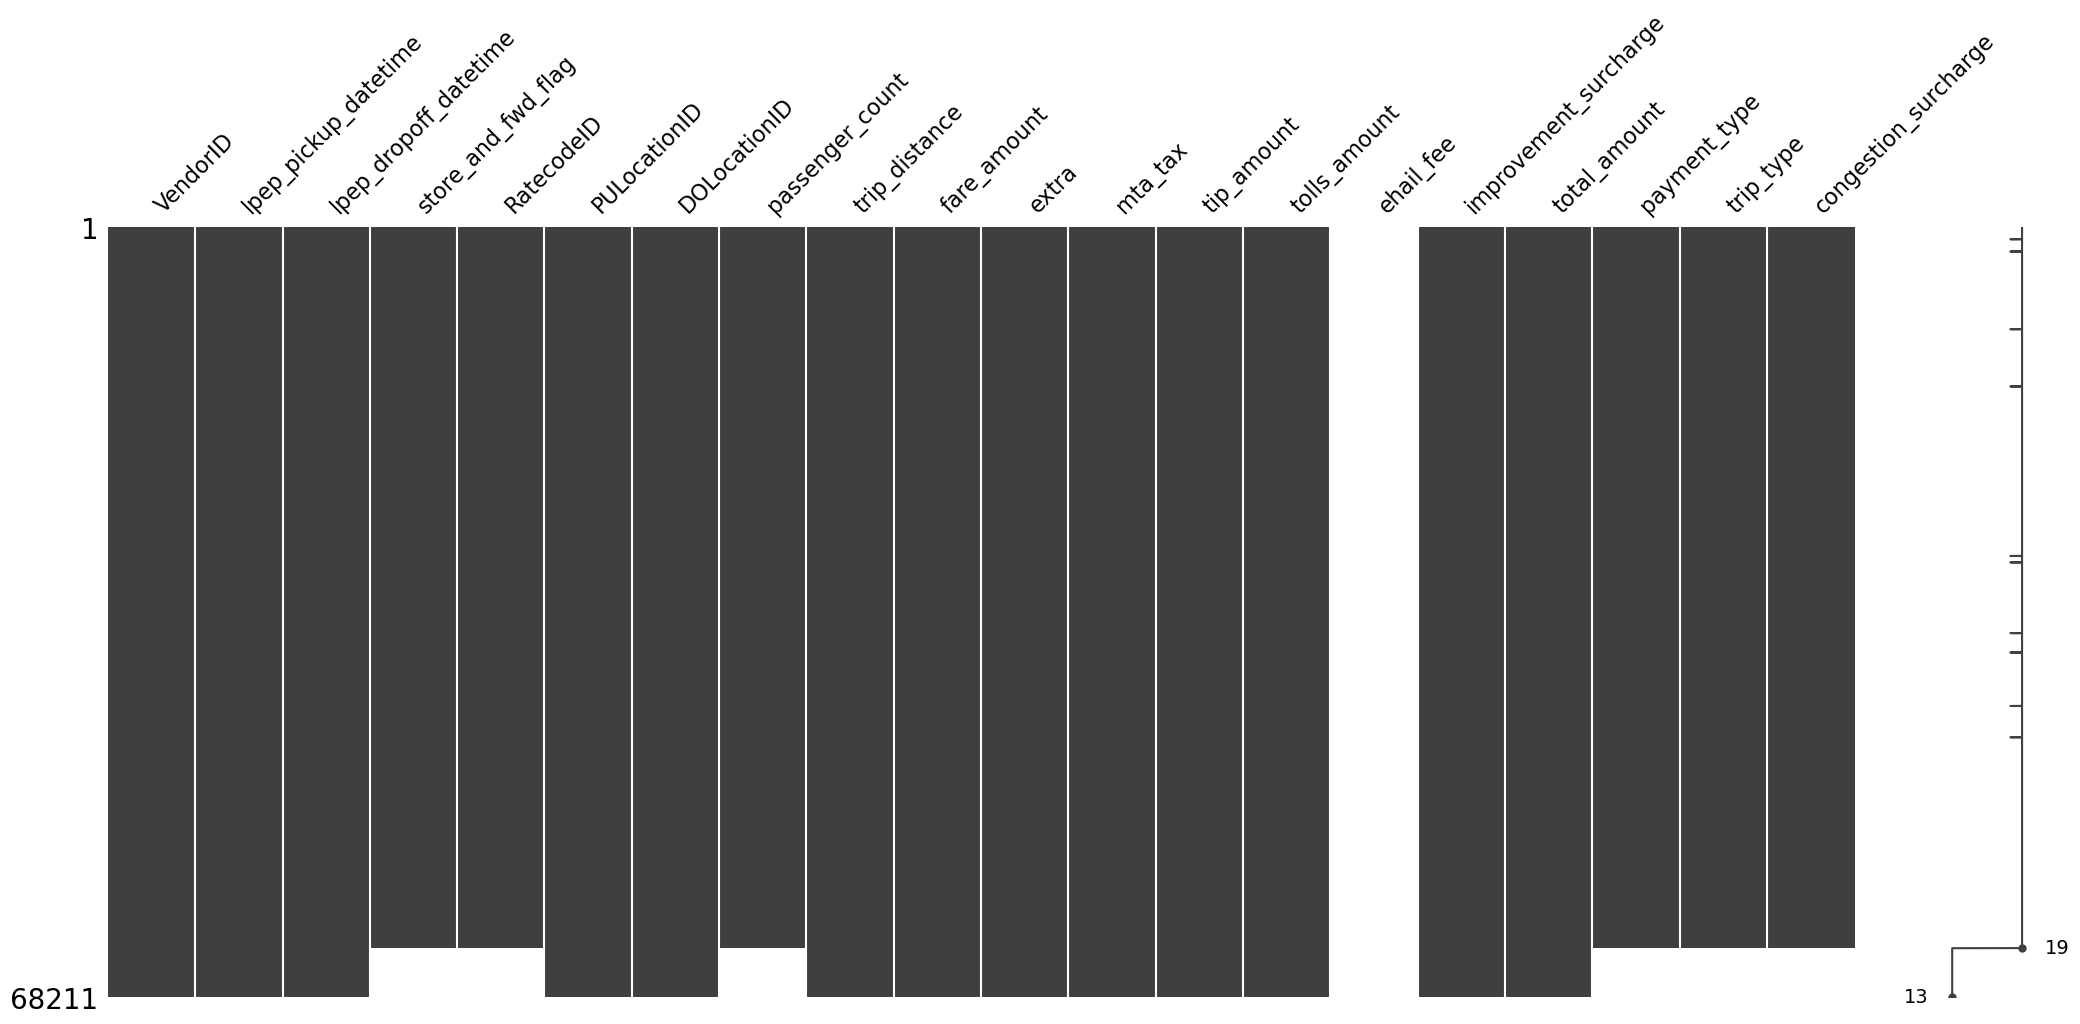

In [ ]:
# Matrix plot — memperlihatkan posisi nilai yang hilang di dataset

msno.matrix(df)
plt.show()

Setelah dilakukan pencengekan untuk missing values, berikut beberapa informasi yang didapatkan:
1. Terdapat 13 kolom yang memiliki data lengkap.
2. Terdapat 6.33% - 6.35% missing values pada kolom store_and_fwd_flag, RatecodeID, passenger_count, payment type, congestion_surcharge. Missing values pada kolom-kolom ini kemungkinan besar berasal dari input yang tidak direkam atau tidak relevan untuk beberapa tipe perjalanan. 
3. Ketika dilakukan pengecekan untuk menampilkan semua baris yang nilai missing, maka jumlahnya akan sama dengan keseluruhan data dikarenakan pada kolom ehail_fee semuanya berisi value NULL. Oleh karena itu, kolom ini perlu dihilangkan.

Upaya untuk menangangi missing values pada kolom-kolom yang disebutkan di atas:
1. Penghapusan kolom ehail_fee akan dilakukan karena tidak ada value apapun/acuan pada kolom tersebut.
2. Dikarenakan kolom store_and_fwd_flag, RatecodeID, Payment_type & trip_type berisikan data kategorikal, maka data dengan value NULL akan diisi dengan Modus / Mode.
3. Dikarenakan kolom passenger_count bertipe numerik dengan rentang value 0 -9, maka akan diisi dengan median.
4. Untuk data pada kolom congestion_surcharge akan diisi 0, karena biaya surcharge hanya akan dikenakan jika perjalanan melawari congestion zone. (NULL = Absence of Fee / Missing Value)

In [22]:
# Copy dataframe
df_copy = df.copy()
df_copy

,VendorID,lpep_pickup_datetime,lpep_dropoff_datetime,store_and_fwd_flag,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,extra,mta_tax,tip_amount,tolls_amount,ehail_fee,improvement_surcharge,total_amount,payment_type,trip_type,congestion_surcharge
0,2,2023-01-01 00:26:10,2023-01-01 00:37:11,N,1.0,166,143,1.0,2.58,14.90,1.0,0.5,4.03,0.0,NaN,1.0,24.18,1.0,1.0,2.75
1,2,2023-01-01 00:51:03,2023-01-01 00:57:49,N,1.0,24,43,1.0,1.81,10.70,1.0,0.5,2.64,0.0,NaN,1.0,15.84,1.0,1.0,0.00
2,2,2023-01-01 00:35:12,2023-01-01 00:41:32,N,1.0,223,179,1.0,0.00,7.20,1.0,0.5,1.94,0.0,NaN,1.0,11.64,1.0,1.0,0.00
3,1,2023-01-01 00:13:14,2023-01-01 00:19:03,N,1.0,41,238,1.0,1.30,6.50,0.5,1.5,1.70,0.0,NaN,1.0,10.20,1.0,1.0,0.00
4,1,2023-01-01 00:33:04,2023-01-01 00:39:02,N,1.0,41,74,1.0,1.10,6.00,0.5,1.5,0.00,0.0,NaN,1.0,8.00,1.0,1.0,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
68206,2,2023-01-31 22:29:00,2023-01-31 22:42:00,NaN,NaN,49,62,NaN,4070.82,15.70,0.0,0.0,0.00,0.0,NaN,1.0,16.70,NaN,NaN,NaN
68207,2,2023-01-31 22:40:00,2023-01-31 22:48:00,NaN,NaN,10,205,NaN,2.14,4.41,0.0,0.0,0.00,0.0,NaN,1.0,5.41,NaN,NaN,NaN
68208,2,2023-01-31 23:46:00,2023-02-01 00:02:00,NaN,NaN,66,37,NaN,3.44,16.53,0.0,0.0,3.51,0.0,NaN,1.0,21.04,NaN,NaN,NaN
68209,2,2023-01-31 23:01:00,2023-01-31 23:19:00,NaN,NaN,225,189,NaN,3.03,14.98,0.0,0.0,3.20,0.0,NaN,1.0,19.18,NaN,NaN,NaN


Untuk selanjutnya, pembersihan dan analisis akan menggunakan dataframe yang sudah diduplikasi guna menghidari kerusakan data asli.

In [ ]:
# Melakukan penghapusan kolom ehail_fee
df_copy = df_copy.drop(columns=['ehail_fee'])
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 68211 entries, 0 to 68210
Data columns (total 19 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   VendorID               68211 non-null  int64  
 1   lpep_pickup_datetime   68211 non-null  object 
 2   lpep_dropoff_datetime  68211 non-null  object 
 3   store_and_fwd_flag     63887 non-null  object 
 4   RatecodeID             63887 non-null  float64
 5   PULocationID           68211 non-null  int64  
 6   DOLocationID           68211 non-null  int64  
 7   passenger_count        63887 non-null  float64
 8   trip_distance          68211 non-null  float64
 9   fare_amount            68211 non-null  float64
 10  extra                  68211 non-null  float64
 11  mta_tax                68211 non-null  float64
 12  tip_amount             68211 non-null  float64
 13  tolls_amount           68211 non-null  float64
 14  improvement_surcharge  68211 non-null  float64
 15  to

In [24]:
# Melakukan pengisian missing value pada store_and_fwd_flag, RatecodeID, Payment_type & trip_type dengan Modus.

mode_columns = ['store_and_fwd_flag', 'RatecodeID', 'payment_type', 'trip_type']

for col in mode_columns:
    if col in df_copy.columns:
        mode_value = df_copy[col].mode()[0] 
        df_copy[col] = df_copy[col].fillna(mode_value)
        print(f"Kolom '{col}' berhasil diisi dengan modus: {mode_value}")
    else:
        print(f"Kolom '{col}' tidak ditemukan dalam df_copy.")

Kolom 'store_and_fwd_flag' berhasil diisi dengan modus: N
Kolom 'RatecodeID' berhasil diisi dengan modus: 1.0
Kolom 'payment_type' berhasil diisi dengan modus: 1.0
Kolom 'trip_type' berhasil diisi dengan modus: 1.0


In [ ]:
# Melakukan pengisian missing value pada passenger_count dengan median.

median_passenger = df_copy['passenger_count'].median()
df_copy['passenger_count'] = df_copy['passenger_count'].fillna(median_passenger)

print("Median passenger_count yang digunakan:", median_passenger)

Median passenger_count yang digunakan: 1.0


In [26]:
# Melakukan pengisian missing value pada kolom congestion_surcharge dengan 0.

df_copy['congestion_surcharge'] = df_copy['congestion_surcharge'].fillna(0)
print("Missing value pada kolom congestion_surcharge telah diisi dengan 0.")


Missing value pada kolom congestion_surcharge telah diisi dengan 0.


In [ ]:
# Melakukan pengecekan setelah mengatasi missing values.

(df_copy.isna().sum() / len(df_copy)) *100

VendorID                 0.0
lpep_pickup_datetime     0.0
lpep_dropoff_datetime    0.0
store_and_fwd_flag       0.0
RatecodeID               0.0
PULocationID             0.0
DOLocationID             0.0
passenger_count          0.0
trip_distance            0.0
fare_amount              0.0
extra                    0.0
mta_tax                  0.0
tip_amount               0.0
tolls_amount             0.0
improvement_surcharge    0.0
total_amount             0.0
payment_type             0.0
trip_type                0.0
congestion_surcharge     0.0
dtype: float64

### Data Formatting

Setelah melakukan cleansing untuk kolom-kolom yang memiliki missing values, data formating perlu dilakukan agar struktur data yang akan ditampilkan sesuai dengan analisa lanjutan. Adapun perubahan format untuk struktur data, antara lain:
1. Merubah format kolom Pick-up & Drop-off datetime dari object ke datetime format.
2. Merubah format kolom Ratecod_ID, passenger_count, payment_type & trip_type dari float to integer. Merubah kolom-kolom ini kedalam bentuk integer dikarenakan angka yang tertera pada dataframe (e.g. 1 - 5) untuk kolom trip_type, payment_type & Ratecode_ID mengindikasikan code. Sedangkan, untuk passenger_count mengidikasikan total penumpang (akan jadi anomali jika dalam analisa nantinya data yang dihasilkan seperti 1.5).


In [28]:
# Merubah format kolom Pick-up & Drop-off datetime dari object ke datetime format

df_copy['lpep_pickup_datetime'] = pd.to_datetime(df_copy['lpep_pickup_datetime'])
df_copy['lpep_dropoff_datetime'] = pd.to_datetime(df_copy['lpep_dropoff_datetime'])

df_copy.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 68211 entries, 0 to 68210
Data columns (total 19 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   VendorID               68211 non-null  int64         
 1   lpep_pickup_datetime   68211 non-null  datetime64[ns]
 2   lpep_dropoff_datetime  68211 non-null  datetime64[ns]
 3   store_and_fwd_flag     68211 non-null  object        
 4   RatecodeID             68211 non-null  float64       
 5   PULocationID           68211 non-null  int64         
 6   DOLocationID           68211 non-null  int64         
 7   passenger_count        68211 non-null  float64       
 8   trip_distance          68211 non-null  float64       
 9   fare_amount            68211 non-null  float64       
 10  extra                  68211 non-null  float64       
 11  mta_tax                68211 non-null  float64       
 12  tip_amount             68211 non-null  float64       
 13  t

In [ ]:
# Merubah format kolom Ratecode_ID, passenger_count, payment_type & trip_type dari float to integer.

df_copy['RatecodeID'] = df_copy['RatecodeID'].astype(int)
df_copy['passenger_count'] = df_copy['passenger_count'].astype(int)
df_copy['payment_type'] = df_copy['payment_type'].astype(int)
df_copy['trip_type'] = df_copy['trip_type'].astype(int)

df_copy.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 68211 entries, 0 to 68210
Data columns (total 19 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   VendorID               68211 non-null  int64         
 1   lpep_pickup_datetime   68211 non-null  datetime64[ns]
 2   lpep_dropoff_datetime  68211 non-null  datetime64[ns]
 3   store_and_fwd_flag     68211 non-null  object        
 4   RatecodeID             68211 non-null  int64         
 5   PULocationID           68211 non-null  int64         
 6   DOLocationID           68211 non-null  int64         
 7   passenger_count        68211 non-null  int64         
 8   trip_distance          68211 non-null  float64       
 9   fare_amount            68211 non-null  float64       
 10  extra                  68211 non-null  float64       
 11  mta_tax                68211 non-null  float64       
 12  tip_amount             68211 non-null  float64       
 13  t

Dapat dilihat bahwa, setelah dilakukan data cleaning & data formating pada data yang ada, data menjadi lebih sesuai dan rapih. Kolom Pick-up & Drop-off datetime pun sudah berubah formatnya menjadi datetime, hal ini meminimalisir error pada analisis kedepannya. 

Setelah menangani kedua hal di atas, maka hal yang perlu dilakukan selanjutkan adalah melakukan penaganan untuk data-data anomali lainnya, seperti outlier. Seperti yang sudah disebutkan sebelumnya, berikut adalah beberapa concern yang perlu ditangani, antara lain:
1. Pada kolom tarif dan biaya memiliki beberapa nilai anomali yang di mana nilai pada kolom fare_amount, extra, mta_tax, tip_amount, tolls_amount, congestion_surcharge dan bahkan total_amount memiliki nilai negatif. Dalam kondisi nyata, nilai ini tidak mungkin terjadi, sehingga perlu ditinjau sebagai anomali yang harus dibersihkan atau dihapus.
2. Kolom trip_distance memiliki outlier ekstrem (120.098 mil), jauh di atas rata-rata (8.11 mil).

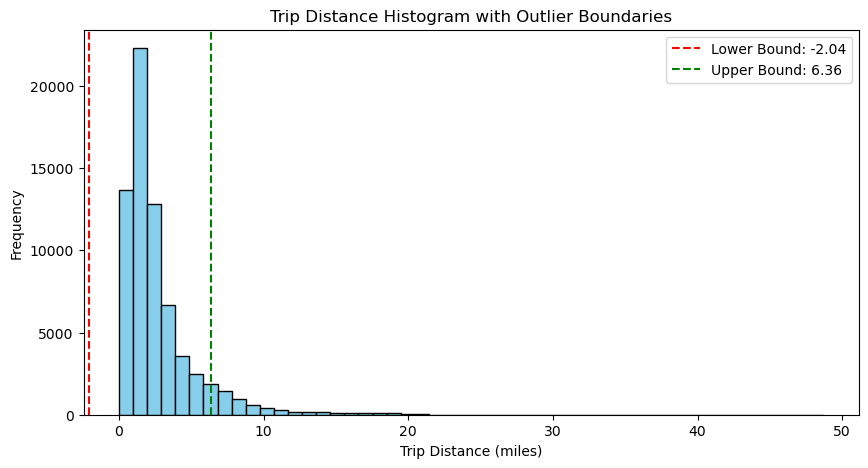

In [ ]:
# Pengecekan distribusi data pada kolom trip_distance

data = df_copy['trip_distance']

# Hitung IQR
Q1 = data.quantile(0.25)
Q3 = data.quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

plt.figure(figsize=(10,5))
plt.hist(data[data < 50], bins=50, edgecolor='k', color='skyblue')
plt.axvline(lower_bound, color='red', linestyle='--', label=f"Lower Bound: {lower_bound:.2f}")
plt.axvline(upper_bound, color='green', linestyle='--', label=f"Upper Bound: {upper_bound:.2f}")
plt.title("Trip Distance Histogram with Outlier Boundaries")
plt.xlabel("Trip Distance (miles)")
plt.ylabel("Frequency")
plt.legend()
plt.show()


Berdasarkan histogram di atas, maka dapat disimpulkan bahwa data pada kolom trip_distance terdistribusi dengan tidak normal (Right-Skewed). Pada data ini, mengindikasikan bahwa mean > median yang di mana nilai standar deviasinya sebesar 585.10 pada kolom trip_distance artinya penyebaran datanya sangat besar dan ini merupakan indikator kuat bahwa dataset mengandung outlier ekstrem.

Agar mendapatkan analisis yang valid kedepannya, maka outlier dari data ini perlu ditangani.

Berdasarkan data yang diperoleh dari Google Maps, jarak lurus terjauh melintasi NYC mencakup seluruh wilayah 5 borough adalah sekitar 35 - 40 mil. Untuk menetapkan batas aman untuk filter outlier, maka data yang >80 Mil akan dibuang karena sudah lebih dari 2x batas maksimum wajar. 

In [32]:
# Hapus trip_distance yang tidak masuk akal
df_copy = df_copy[(df_copy['trip_distance'] > 0) & 
                  (df_copy['trip_distance'] < 80)]

print("Jumlah baris setelah menghapus outlier trip_distance:", len(df_copy))


Jumlah baris setelah menghapus outlier trip_distance: 64824


In [33]:
outliers = data[(data <= lower_bound) | (data >= upper_bound)]
outliers.head(20)


12      7.08
15     11.30
17      8.28
31     10.44
32      6.78
35      6.70
40     10.35
49      8.55
53      9.01
57      7.83
60     12.73
63      7.30
76     10.45
89     12.40
91      7.52
97     15.39
101    14.97
109    11.34
113    10.96
118     6.53
Name: trip_distance, dtype: float64

In [36]:
df_copy.describe()

,VendorID,lpep_pickup_datetime,lpep_dropoff_datetime,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,payment_type,trip_type,congestion_surcharge
count,64824.000000,64824,64824,64824.000000,64824.000000,64824.000000,64824.000000,64824.000000,64824.000000,64824.000000,64824.000000,64824.000000,64824.000000,64824.000000,64824.000000,64824.000000,64824.000000,64824.000000
mean,1.879612,2023-01-16 20:35:52.379381248,2023-01-16 20:53:58.218283264,1.080140,97.452626,138.229437,1.304563,2.808427,16.420921,0.854282,0.577626,2.194626,0.155878,0.954307,21.708133,1.350056,1.013267,0.709540
min,1.000000,2009-01-01 20:21:27,2009-01-02 11:07:31,1.000000,3.000000,1.000000,0.000000,0.010000,-70.000000,-2.500000,-0.500000,0.000000,0.000000,-1.000000,-71.500000,1.000000,1.000000,-2.750000
25%,2.000000,2023-01-09 12:15:16,2023-01-09 12:34:17.500000,1.000000,74.000000,74.000000,1.000000,1.220000,9.300000,0.000000,0.500000,0.000000,0.000000,1.000000,12.960000,1.000000,1.000000,0.000000
50%,2.000000,2023-01-17 09:13:11,2023-01-17 09:28:17,1.000000,75.000000,138.000000,1.000000,1.930000,13.000000,0.000000,0.500000,1.800000,0.000000,1.000000,17.880000,1.000000,1.000000,0.000000
75%,2.000000,2023-01-24 16:05:53,2023-01-24 16:21:43.500000,1.000000,116.000000,220.000000,1.000000,3.320000,19.590000,1.000000,0.500000,3.410000,0.000000,1.000000,26.040000,2.000000,1.000000,2.750000
max,2.000000,2023-02-01 03:10:05,2023-02-01 17:27:05,99.000000,265.000000,265.000000,8.000000,66.180000,455.000000,12.500000,1.500000,222.220000,36.050000,1.000000,456.000000,4.000000,2.000000,2.750000
std,0.325417,NaN,NaN,1.313563,60.049554,76.516348,0.963298,2.804116,12.458658,1.282371,0.364235,3.002487,1.048426,0.185283,14.602536,0.493522,0.114415,1.203477


Setelah dilakukan pembersihan pada data outlier di kolom trip_distances, nilai maksimum pada kolom tersebut adalah 66.18 mil (sebelumnya 120.098 mil).

In [37]:
# Hapus data dengan nilai negatif pada kolom tarif dan biaya
df_copy = df_copy[
    (df_copy['fare_amount'] >= 0) &
    (df_copy['extra'] >= 0) &
    (df_copy['mta_tax'] >= 0) &
    (df_copy['tip_amount'] >= 0) &
    (df_copy['tolls_amount'] >= 0) &
    (df_copy['congestion_surcharge'] >= 0) &
    (df_copy['total_amount'] >= 0)
]


In [ ]:
#melakukan pengecekan dengan menjumlahkan value di bawah 0 untuk semua kolom yang terindikasi memiliki value di bawah 0.

(df_copy[['fare_amount', 'extra', 'mta_tax', 'tip_amount', 'tolls_amount', 'total_amount','congestion_surcharge']] < 0).sum()



fare_amount             0
extra                   0
mta_tax                 0
tip_amount              0
tolls_amount            0
total_amount            0
congestion_surcharge    0
dtype: int64

In [39]:
df_copy.describe()

,VendorID,lpep_pickup_datetime,lpep_dropoff_datetime,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,payment_type,trip_type,congestion_surcharge
count,64714.000000,64714,64714,64714.000000,64714.000000,64714.000000,64714.000000,64714.000000,64714.000000,64714.000000,64714.000000,64714.000000,64714.000000,64714.000000,64714.000000,64714.000000,64714.000000,64714.000000
mean,1.879408,2023-01-16 20:40:41.295531264,2023-01-16 20:58:48.598263296,1.080014,97.452128,138.288794,1.304277,2.812180,16.460035,0.857079,0.579388,2.198216,0.156143,0.957420,21.759837,1.347127,1.013243,0.710874
min,1.000000,2009-01-01 20:21:27,2009-01-02 11:07:31,1.000000,3.000000,1.000000,0.000000,0.010000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000
25%,2.000000,2023-01-09 12:24:24.249999872,2023-01-09 12:40:12.249999872,1.000000,74.000000,74.000000,1.000000,1.220000,9.300000,0.000000,0.500000,0.000000,0.000000,1.000000,12.960000,1.000000,1.000000,0.000000
50%,2.000000,2023-01-17 09:16:13.500000,2023-01-17 09:32:55.500000,1.000000,75.000000,138.000000,1.000000,1.940000,13.015000,0.000000,0.500000,1.800000,0.000000,1.000000,17.900000,1.000000,1.000000,0.000000
75%,2.000000,2023-01-24 16:06:42.500000,2023-01-24 16:22:44.750000128,1.000000,116.000000,220.000000,1.000000,3.330000,19.770000,1.000000,0.500000,3.410000,0.000000,1.000000,26.050000,2.000000,1.000000,2.750000
max,2.000000,2023-02-01 03:10:05,2023-02-01 17:27:05,99.000000,265.000000,265.000000,8.000000,66.180000,455.000000,12.500000,1.500000,222.220000,36.050000,1.000000,456.000000,4.000000,2.000000,2.750000
std,0.325655,NaN,NaN,1.314309,60.045560,76.516641,0.963470,2.803404,12.428024,1.280966,0.361982,3.003690,1.049297,0.168389,14.557214,0.488113,0.114314,1.203923


Setelah dilakukan pengapusan untuk semua angka anomali pada kolom fee & amount, angka yang dihasilkan dari penjumlahan value yang berada di bawah 0 = 0, maka sudah tidak ada lagi anomali value pada kolom-kolom tersebut. Berdasarkan proses cleansing yang sudah dilakukan, data yang tersisa pada dataset ini adalah **64.714**.

### Feature Engineering

Setelah tahap data cleansing & formating, sebagai tambahan, saya menambahkan beberapa kolom tambahan seperti yang sudah disebutkan di awal, yang mana bisa membantu menambah kegunaan untuk analisis kedepannya. Kolom tambahan ini antara lain:
1. Trip Duration (in Mins)
2. Average Speed
3. Pickup Time (breakdown by Hour, Day & Month)
4. Trip Category Based on Distance

In [41]:
#1. Trip Duration (in Mins)

df_copy['trip_duration_min'] = (
    df_copy['lpep_dropoff_datetime'] - df_copy['lpep_pickup_datetime']
).dt.total_seconds() / 60

df_copy.head()


,VendorID,lpep_pickup_datetime,lpep_dropoff_datetime,store_and_fwd_flag,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,payment_type,trip_type,congestion_surcharge,trip_duration_min
0,2,2023-01-01 00:26:10,2023-01-01 00:37:11,N,1,166,143,1,2.58,14.9,1.0,0.5,4.03,0.0,1.0,24.18,1,1,2.75,11.016667
1,2,2023-01-01 00:51:03,2023-01-01 00:57:49,N,1,24,43,1,1.81,10.7,1.0,0.5,2.64,0.0,1.0,15.84,1,1,0.00,6.766667
3,1,2023-01-01 00:13:14,2023-01-01 00:19:03,N,1,41,238,1,1.30,6.5,0.5,1.5,1.70,0.0,1.0,10.20,1,1,0.00,5.816667
4,1,2023-01-01 00:33:04,2023-01-01 00:39:02,N,1,41,74,1,1.10,6.0,0.5,1.5,0.00,0.0,1.0,8.00,1,1,0.00,5.966667
5,2,2023-01-01 00:53:31,2023-01-01 01:11:04,N,1,41,262,1,2.78,17.7,1.0,0.5,0.00,0.0,1.0,22.95,2,1,2.75,17.550000


In [42]:
#2. Average Speed

df_copy['avg_speed_mph'] = df_copy['trip_distance'] / (df_copy['trip_duration_min'] / 60)


In [43]:
#3. Pickup Time

df_copy['pickup_hour'] = df_copy['lpep_pickup_datetime'].dt.hour
df_copy['pickup_day'] = df_copy['lpep_pickup_datetime'].dt.day
df_copy['pickup_month'] = df_copy['lpep_pickup_datetime'].dt.month
df_copy['pickup_weekday'] = df_copy['lpep_pickup_datetime'].dt.day_name()


In [44]:
#4. Trip Category Based on Distance

df_copy['distance_category'] = pd.cut(
    df_copy['trip_distance'],
    bins=[0, 2, 5, 10, 20, 80],
    labels=['Very Short', 'Short', 'Medium', 'Long', 'Very Long']
)


In [45]:
df_copy.head()

,VendorID,lpep_pickup_datetime,lpep_dropoff_datetime,store_and_fwd_flag,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,...,payment_type,trip_type,congestion_surcharge,trip_duration_min,avg_speed_mph,pickup_hour,pickup_day,pickup_month,pickup_weekday,distance_category
0,2,2023-01-01 00:26:10,2023-01-01 00:37:11,N,1,166,143,1,2.58,14.9,...,1,1,2.75,11.016667,14.051437,0,1,1,Sunday,Short
1,2,2023-01-01 00:51:03,2023-01-01 00:57:49,N,1,24,43,1,1.81,10.7,...,1,1,0.00,6.766667,16.049261,0,1,1,Sunday,Very Short
3,1,2023-01-01 00:13:14,2023-01-01 00:19:03,N,1,41,238,1,1.30,6.5,...,1,1,0.00,5.816667,13.409742,0,1,1,Sunday,Very Short
4,1,2023-01-01 00:33:04,2023-01-01 00:39:02,N,1,41,74,1,1.10,6.0,...,1,1,0.00,5.966667,11.061453,0,1,1,Sunday,Very Short
5,2,2023-01-01 00:53:31,2023-01-01 01:11:04,N,1,41,262,1,2.78,17.7,...,2,1,2.75,17.550000,9.504274,0,1,1,Sunday,Short


Untuk mendapatkan detail analis kedepannya, saya menambahkan informasi Borough & Zone dari file NYC_Taxi_Zone.csv dengan melakukan merging kedua tabel berdasarkan unique value yang ada.

In [51]:
zone = pd.read_csv("NYC_Taxi_Zone.csv", delimiter=';')


In [52]:
zone.head()

,LocationID,Borough,Zone,service_zone
0,1,EWR,Newark Airport,EWR
1,2,Queens,Jamaica Bay,Boro Zone
2,3,Bronx,Allerton/Pelham Gardens,Boro Zone
3,4,Manhattan,Alphabet City,Yellow Zone
4,5,Staten Island,Arden Heights,Boro Zone


In [ ]:
#Merging untuk kedua dateset

# Pickup merge
df_copy = df_copy.merge(
    zone[['LocationID','Zone','Borough']],
    left_on='PULocationID', right_on='LocationID', how='left'
).rename(columns={'Zone':'PUZone', 'Borough':'PUBorough'}).drop(columns=['LocationID'])

# Dropoff merge
df_copy = df_copy.merge(
    zone[['LocationID','Zone','Borough']],
    left_on='DOLocationID', right_on='LocationID', how='left'
).rename(columns={'Zone':'DOZone', 'Borough':'DOBorough'}).drop(columns=['LocationID'])



In [54]:
df_copy[['PULocationID','PUZone','PUBorough','DOLocationID','DOZone','DOBorough']].head()


,PULocationID,PUZone,PUBorough,DOLocationID,DOZone,DOBorough
0,166,Morningside Heights,Manhattan,143,Lincoln Square West,Manhattan
1,24,Bloomingdale,Manhattan,43,Central Park,Manhattan
2,41,Central Harlem,Manhattan,238,Upper West Side North,Manhattan
3,41,Central Harlem,Manhattan,74,East Harlem North,Manhattan
4,41,Central Harlem,Manhattan,262,Yorkville East,Manhattan


In [55]:
df_copy.head()

,VendorID,lpep_pickup_datetime,lpep_dropoff_datetime,store_and_fwd_flag,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,...,avg_speed_mph,pickup_hour,pickup_day,pickup_month,pickup_weekday,distance_category,PUZone,PUBorough,DOZone,DOBorough
0,2,2023-01-01 00:26:10,2023-01-01 00:37:11,N,1,166,143,1,2.58,14.9,...,14.051437,0,1,1,Sunday,Short,Morningside Heights,Manhattan,Lincoln Square West,Manhattan
1,2,2023-01-01 00:51:03,2023-01-01 00:57:49,N,1,24,43,1,1.81,10.7,...,16.049261,0,1,1,Sunday,Very Short,Bloomingdale,Manhattan,Central Park,Manhattan
2,1,2023-01-01 00:13:14,2023-01-01 00:19:03,N,1,41,238,1,1.30,6.5,...,13.409742,0,1,1,Sunday,Very Short,Central Harlem,Manhattan,Upper West Side North,Manhattan
3,1,2023-01-01 00:33:04,2023-01-01 00:39:02,N,1,41,74,1,1.10,6.0,...,11.061453,0,1,1,Sunday,Very Short,Central Harlem,Manhattan,East Harlem North,Manhattan
4,2,2023-01-01 00:53:31,2023-01-01 01:11:04,N,1,41,262,1,2.78,17.7,...,9.504274,0,1,1,Sunday,Short,Central Harlem,Manhattan,Yorkville East,Manhattan


Setelah merging dilakukan, PULocationID & DOLocationID sudah diterjemahkan ke dalam data Borough dan Zone di New York City.

In [59]:
#Melakukan pengecekan untuk value NULL pada kolom baru

df_copy[['PUZone','PUBorough','DOZone','DOBorough']].isna().sum()


PUZone        31
PUBorough     25
DOZone       133
DOBorough    198
dtype: int64

In [ ]:
#Menampilkan semua baris yang berisikan value null pada ke-empat kolom baru

df_copy[df_copy[['PUZone','PUBorough','DOZone','DOBorough']].isna().any(axis=1)]


,VendorID,lpep_pickup_datetime,lpep_dropoff_datetime,store_and_fwd_flag,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,...,avg_speed_mph,pickup_hour,pickup_day,pickup_month,pickup_weekday,distance_category,PUZone,PUBorough,DOZone,DOBorough
30,2,2023-01-01 00:46:48,2023-01-01 01:08:17,N,4,95,265,1,10.44,47.10,...,29.157486,0,1,1,Sunday,Long,Forest Hills,Queens,Outside of NYC,NaN
425,2,2023-01-01 11:41:18,2023-01-01 12:22:07,N,3,65,265,1,12.37,74.80,...,18.183748,11,1,1,Sunday,Long,Downtown Brooklyn/MetroTech,Brooklyn,Outside of NYC,NaN
752,2,2023-01-01 16:20:22,2023-01-01 16:20:24,N,1,42,264,1,0.02,3.00,...,36.000000,16,1,1,Sunday,Very Short,Central Harlem North,Manhattan,NaN,Unknown
950,2,2023-01-01 18:56:10,2023-01-01 18:56:11,N,5,33,264,1,0.01,30.00,...,36.000000,18,1,1,Sunday,Very Short,Brooklyn Heights,Brooklyn,NaN,Unknown
1026,2,2023-01-01 19:58:34,2023-01-01 19:58:37,N,5,65,264,1,0.18,45.00,...,216.000000,19,1,1,Sunday,Very Short,Downtown Brooklyn/MetroTech,Brooklyn,NaN,Unknown
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
63847,2,2023-01-25 11:26:00,2023-01-25 11:35:00,N,1,240,265,1,3.87,26.03,...,25.800000,11,25,1,Wednesday,Short,Van Cortlandt Park,Bronx,Outside of NYC,NaN
64253,2,2023-01-28 07:39:00,2023-01-28 08:30:00,N,1,89,265,1,21.87,97.24,...,25.729412,7,28,1,Saturday,Very Long,Flatbush/Ditmas Park,Brooklyn,Outside of NYC,NaN
64311,2,2023-01-28 16:45:00,2023-01-28 17:39:00,N,1,49,265,1,7.74,36.40,...,8.600000,16,28,1,Saturday,Medium,Clinton Hill,Brooklyn,Outside of NYC,NaN
64454,2,2023-01-29 21:41:00,2023-01-29 22:13:00,N,1,175,265,1,21.30,82.19,...,39.937500,21,29,1,Sunday,Very Long,Oakland Gardens,Queens,Outside of NYC,NaN


Setelah dicek di dalam dataset NYC_Taxi_Zone.csv, ada beberapa locationID yang mengindikasikan bahwa pickup and drop off location berada di luar NYC atau bahkan tidak diketahui (264 & 265). Oleh karena itu, saya memutuskan untuk mengisi semua value yang ada di keempat kolom baru tersebut dengan value "Unknown". Dibandingkan dengan menghapus semua data yang berisi null tersebut, replacing value NULL dilakukan karena pada satu record trip (pick up to drop off) tidak memberikan value null untuk keduanya, ada trip yang diketahui salah satu locationnya saja.

In [61]:
#Replacing value NULL pada keempat kolom baru

df_copy[['PUZone','PUBorough','DOZone','DOBorough']] = df_copy[['PUZone','PUBorough','DOZone','DOBorough']].fillna("Unknown")



In [62]:
#Memastikan agar tidak ada value NULL lagi di keempat tabel baru

df_copy[['PUZone','PUBorough','DOZone','DOBorough']].isna().sum()


PUZone       0
PUBorough    0
DOZone       0
DOBorough    0
dtype: int64

## Data Cleansed

Setelah melakukan data cleaning, formatting & feature engineering, berikut hasil finalnya:

In [80]:


listItem = []

for col in df_copy.columns:
    sample_vals = df_copy[col].drop_duplicates().sample(
        n=min(2, df_copy[col].nunique()), 
        random_state=42
    ).values.tolist()
    
    listItem.append([
        col,                           # nama kolom
        df_copy[col].dtype,            # tipe data
        df_copy[col].isna().sum(),     # jumlah null
        df_copy[col].nunique()        # jumlah nilai unik
    ])

dfDesc = pd.DataFrame(
    columns=['dataFeatures', 'dataType', 'null', 'unique'],
    data=listItem
)

print(df_copy.shape)
dfDesc


(64714, 30)


,dataFeatures,dataType,null,unique
0,VendorID,int64,0,2
1,lpep_pickup_datetime,datetime64[ns],0,63398
2,lpep_dropoff_datetime,datetime64[ns],0,63318
3,store_and_fwd_flag,object,0,2
4,RatecodeID,int64,0,6
5,PULocationID,int64,0,198
6,DOLocationID,int64,0,246
7,passenger_count,int64,0,9
8,trip_distance,float64,0,1832
9,fare_amount,float64,0,2406


Sebelum dilakukan data cleaning & formating, dataset memiliki total 68.211 baris dan 20 kolom. Saat ini, dataset yang baru memiliki 64.714 baris dan 30 kolom yang berasal dari pembersihan data dan beberapa kolom tambahan yang dihasilkan dari perhitungan kolom yang ada dan merging ke dataset lain. Dataset saat ini sudah tidak lagi memiliki value NULL di semua kolom dan sudah siap untuk dilakukan analisis lanjutan terkait problem statementnya.

In [64]:
df_copy.to_csv('NYC TLC Trip Record Cleaned.csv',index=False)

# Data Analysis

Setelah melakukan data cleaning, proses lanjutan yaitu data analisis terhadap dataset yang ada guna menjawab problem statement di atas. Perusahaan ingin mengetahui terkait Customer Demand & Behaviour Pattern terkait memahami pola permintaan layanan taksi di berbagai Borough untuk membantu optimalisasi distribusi armada dan peningkatan layanan.

## Demand & Geography Analysis

Analisis yang pertama dilakukan adalah untuk melihat total trip dari masing-masing Borough di NYC. Analisis terpusat pada kolom PUBorough & PUZone untuk mengetahui:
1. Berapa jumlah trip/Borough?
2. Borough manakah yang paling ramai?
3. Zone manakah yang butuh armada paling banyak?

       PUBorough  total_trips
2      Manhattan        38625
3         Queens        16657
1       Brooklyn         8477
0          Bronx          890
5        Unknown           56
4  Staten Island            9


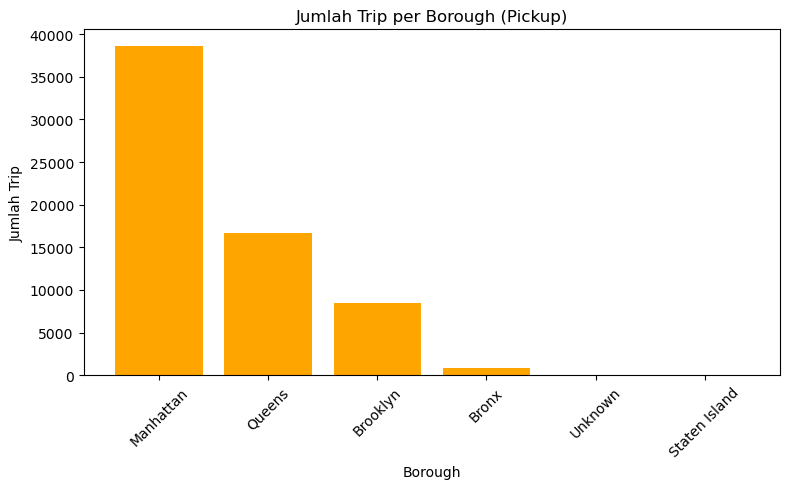

In [97]:
# Jumlah trip per borough berdasarkan lokasi pickup
trips_per_borough = (
    df_copy.groupby('PUBorough')
           .size()
           .reset_index(name='total_trips')
           .sort_values('total_trips', ascending=False)
)

print(trips_per_borough)

# Visualisasi bar chart
plt.figure(figsize=(8, 5))
plt.bar(trips_per_borough['PUBorough'], trips_per_borough['total_trips'], color ='orange')
plt.title("Jumlah Trip per Borough (Pickup)")
plt.xlabel("Borough")
plt.ylabel("Jumlah Trip")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()



In [67]:
trips_per_borough['rank'] = range(1, len(trips_per_borough) + 1)
print(trips_per_borough)


       PUBorough  total_trips  rank
2      Manhattan        38625     1
3         Queens        16657     2
1       Brooklyn         8477     3
0          Bronx          890     4
5        Unknown           56     5
4  Staten Island            9     6


In [71]:
# Top 10 pickup zone
top_pu_zones = (
    df_copy['PUZone']
    .value_counts()
    .reset_index()
    .rename(columns={'index': 'PUZone', 'PUZone': 'total_trips'})
    .head(10)
)

print(top_pu_zones)


                total_trips  count
0         East Harlem North  13010
1         East Harlem South   8932
2            Central Harlem   3954
3       Morningside Heights   3846
4              Forest Hills   3703
5              Central Park   2850
6                  Elmhurst   2844
7               Fort Greene   2136
8  Washington Heights South   1782
9                   Astoria   1772


pickup_hour           0   1   2   3   4   5   6    7    8    9   ...   14  \
PUZone                                                           ...        
Astoria               47  49  20  19  12  20  25   30   45   68  ...  122   
Brooklyn Heights       2   1   1   2   1   7  22   18   57   33  ...   36   
Central Harlem        42  29  18  13   9   7  28  216  277  252  ...  310   
Central Harlem North  25  21  16  12   9   2  20   76  100  109  ...  155   
Central Park           2   0   2   0   0   2   9   46   99  174  ...  189   

pickup_hour            15   16   17   18   19   20   21  22  23  
PUZone                                                           
Astoria               100  118  124  131  146   89   69  75  69  
Brooklyn Heights       37   31   48   57   48   44   22  20  14  
Central Harlem        370  257  204  208  168  128  113  83  89  
Central Harlem North  146  110   80   89   57   48   39  52  37  
Central Park          188  322  325  267  244  153   81  33  24 

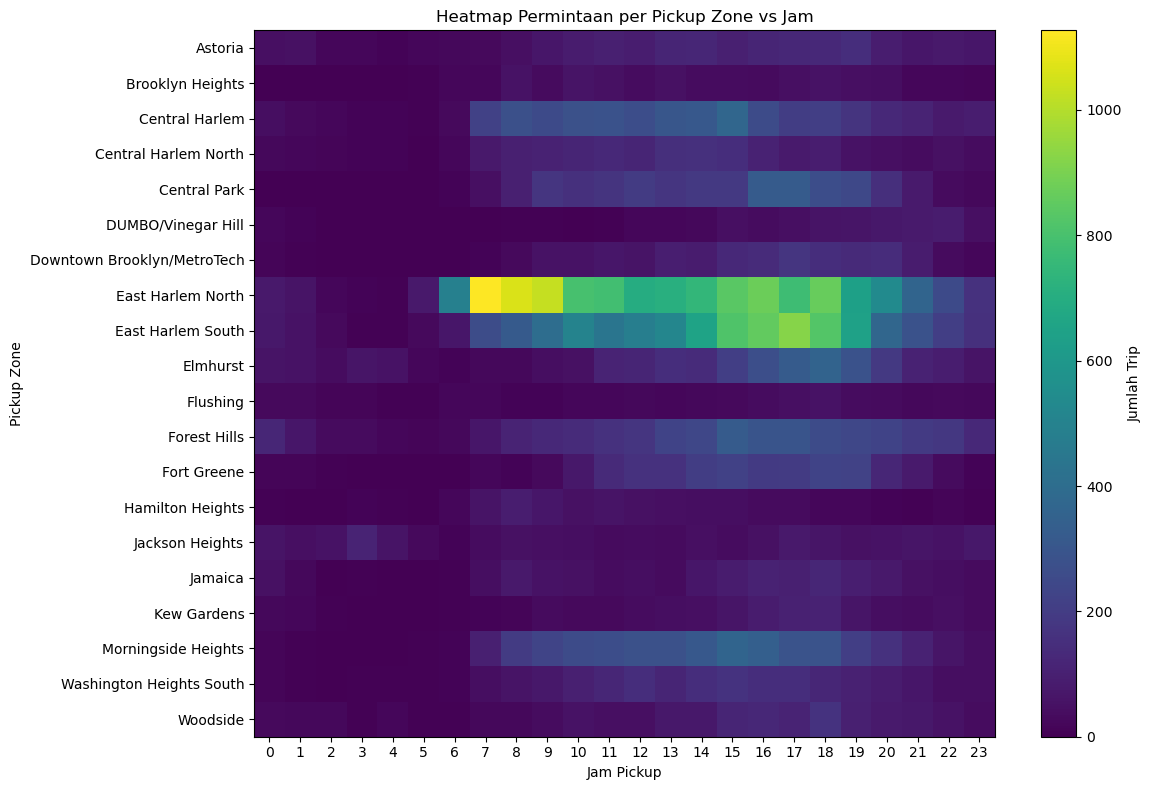

In [142]:
# 20 PUZone dengan trip terbanyak
top_zones = (
    df_copy['PUZone']
    .value_counts()
    .head(20)
    .index
)

# Filter hanya top zones
df_top_zones = df_copy[df_copy['PUZone'].isin(top_zones)]

# PUZone (rows) x pickup_hour (columns)
zone_hour_pivot = (
    df_top_zones
    .groupby(['PUZone', 'pickup_hour'])
    .size()
    .unstack(fill_value=0)
    .sort_index()
)

print(zone_hour_pivot.head())

# Plot heatmap dengan matplotlib
plt.figure(figsize=(12, 8))
plt.imshow(zone_hour_pivot, aspect='auto')
plt.colorbar(label='Jumlah Trip')
plt.title("Heatmap Permintaan per Pickup Zone vs Jam")
plt.xlabel("Jam Pickup")
plt.ylabel("Pickup Zone")

# Set label axis
plt.xticks(ticks=range(len(zone_hour_pivot.columns)), labels=zone_hour_pivot.columns)
plt.yticks(ticks=range(len(zone_hour_pivot.index)), labels=zone_hour_pivot.index)

plt.tight_layout()
plt.show()


In [77]:
#Uji statistik untuk mengetahui apakah ada hubungan antara Pick Up Borough dan Pick Up Hour
#Uji statistik menggunakan Chi-Square dikarenakan kedua data kategorikal
ct = pd.crosstab(df_copy['PUBorough'], df_copy['pickup_hour'])
chi2, pvalue, dof, expected = chi2_contingency(ct)

print("Chi-square Statistic:", chi2)
print("Degrees of Freedom:", dof)
print("P-value:", pvalue)

#Menentukan tingkat signifikansi
alpha = 0.05
print("\nSignificance Level (alpha):", alpha)

#Decision
if pvalue < alpha:
    print("Reject H0 → Ada hubungan signifikan antara Borough dan pickup_hour (variabel dependen)")
else:
    print("Fail to Reject H0 → Tidak ada hubungan signifikan antara Borough dan pickup_hour (variabel independen)")



Chi-square Statistic: 4982.735330126243
Degrees of Freedom: 115
P-value: 0.0

Significance Level (alpha): 0.05
Reject H0 → Ada hubungan signifikan antara Borough dan pickup_hour (variabel dependen)


Berdasarkan uji Chi-Square, terdapat hubungan yang sangat signifikan antara lokasi geografis (borough) dan distribusi permintaan taksi per jam. Hal ini menunjukkan bahwa setiap borough memiliki pola permintaan waktu yang berbeda, sehingga strategi alokasi armada tidak dapat digeneralisasi. Perusahaan perlu menyesuaikan distribusi taksi berdasarkan pola permintaan yang unik untuk masing-masing borough guna meningkatkan efisiensi layanan.

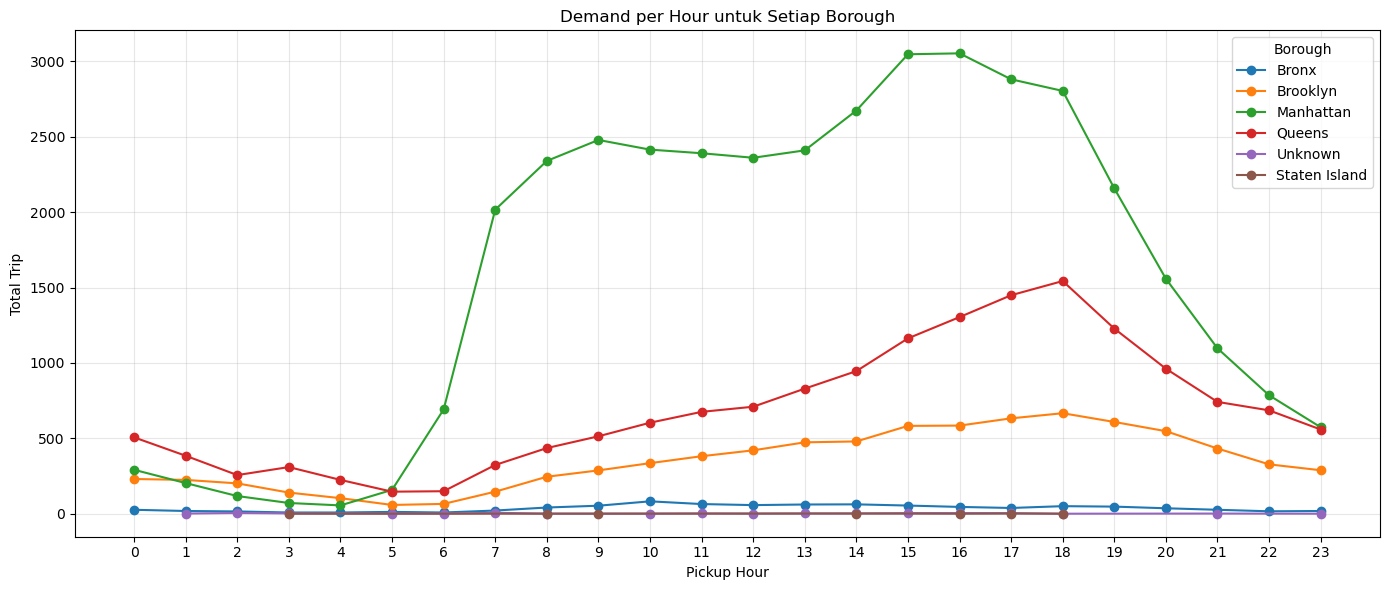

In [135]:
plt.figure(figsize=(14, 6))

df_group = df_copy.groupby(['pickup_hour', 'PUBorough']).size().reset_index(name='count')

for b in df_group['PUBorough'].unique():
    subset = df_group[df_group['PUBorough'] == b]
    plt.plot(subset['pickup_hour'], subset['count'], marker='o', label=b)

plt.title("Demand per Hour untuk Setiap Borough")
plt.xlabel("Pickup Hour")
plt.ylabel("Total Trip")
plt.legend(title="Borough")
plt.grid(True, alpha=0.3)
plt.xticks(range(0,24))
plt.tight_layout()
plt.show()


Berikut temuan dari analisis Demand & Geography:
1. Demand per hour untuk setiap Borough
    - Manhattan mendominasi permintaan pick up pada hampir semua jam dengan lonjakan terbesar di jam 07 - 10 AM (morning rush) & 03 - 06 PM (evening rush) dengan puncak permintaan pick up ada pada pukul 03 PM.
    - Queens & Brooklyn memiliki pola yang sama dengan Manhattan, meskipun total permintaan tidak sebanyak Manhattan.
    - Sedangkan untuk Bronx & Staten Island permintaan cukup stabil dan kecil sepanjang hari.
2. Jumlah trip per Borough
    - Manhattan memiliki total trip jauh lebih besar dibandingkan dengan Borough lainnya mencapai 40k trips diikuti oleh Queens (17k trips) and Brooklyn (9k trips).
    - Dikarenakan rendahnya pick up order pada Borough Bronx & Staten Island, hal ini berpotensi menjadikan area ini low priority untuk growth potential area.
3. Heatmap permintaan Pick up per Zone by Zone
    - Zona East Harlem North menunjukan intensitas paling tinggi, terutama pada pukul 08 - 10 AM & 03 - 06 PM. 
    - Ada beberapa zona yang selalu gelap di setiap jamnya.
    - Ada zona yang cukup potential dalam meningkatkan volume ride pada zona tsb. 

## Trip Characteristic by Borough Analysis

Analisis kedua yang dilakukan bertujuan untuk mengetahui karakteristik perjalanan dari tiap-tiap Borough. Ada beberapa analisis yang dilakukan, antara lain:
1. Jarak rata-rata trip per Borough
2. Distribusi tipe perjalanan per Borough

In [81]:
avg_distance = (
    df_copy.groupby('PUBorough')['trip_distance']
    .mean()
    .reset_index()
    .sort_values('trip_distance', ascending=False)
)

print(avg_distance)


       PUBorough  trip_distance
5        Unknown       7.102857
0          Bronx       3.813416
4  Staten Island       3.641111
1       Brooklyn       3.566737
3         Queens       3.036618
2      Manhattan       2.520304


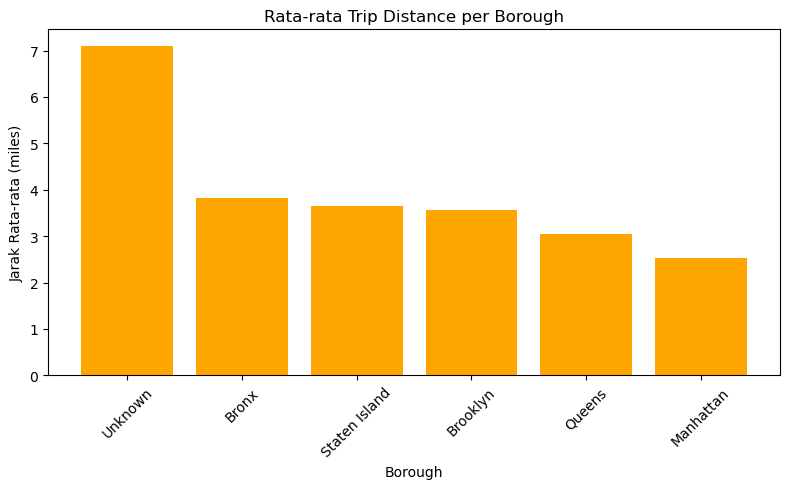

In [96]:
plt.figure(figsize=(8,5))
plt.bar(avg_distance['PUBorough'], avg_distance['trip_distance'], color='orange')

plt.title("Rata-rata Trip Distance per Borough")
plt.xlabel("Borough")
plt.ylabel("Jarak Rata-rata (miles)")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [90]:
dist_alt = (
    df_copy
    .groupby(['PUBorough', 'distance_category'])
    .size()
    .unstack(fill_value=0)
)

print(dist_alt)





distance_category  Very Short  Short  Medium  Long  Very Long
PUBorough                                                    
Bronx                     321    365     144    55          5
Brooklyn                 3420   3219    1395   417         26
Manhattan               21672  12909    3461   536         47
Queens                   8187   5878    2002   539         51
Staten Island               5      1       2     1          0
Unknown                    23     10       6    13          4


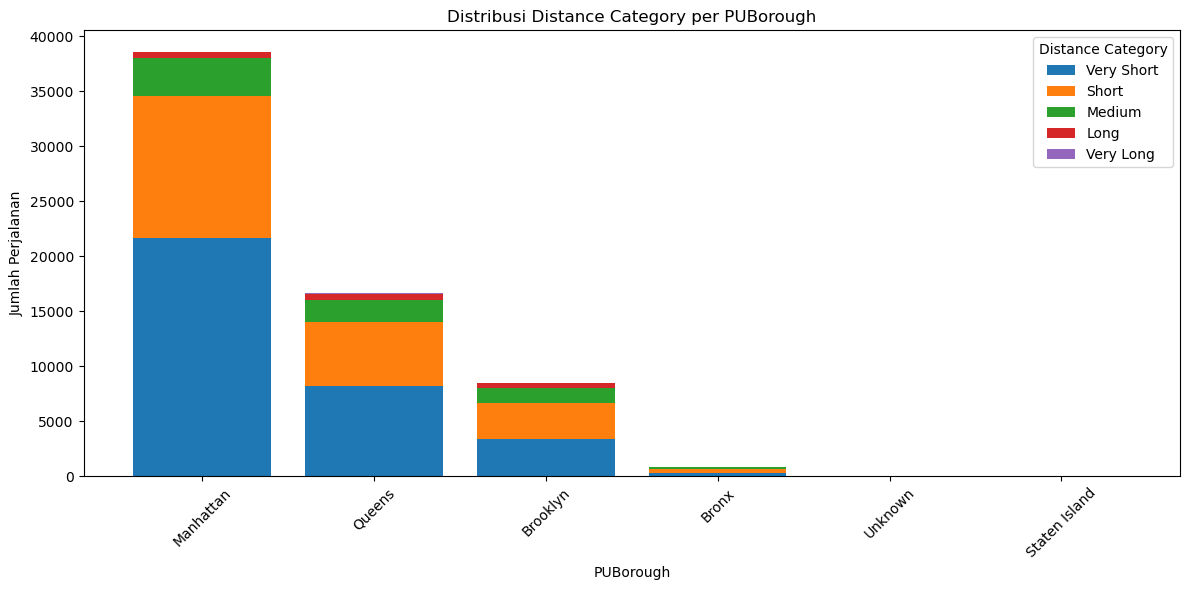

In [143]:
order_cols = ['Very Short', 'Short', 'Medium', 'Long', 'Very Long']
cols = [c for c in order_cols if c in dist_alt.columns] 
dist_plot = dist_alt[cols]


dist_plot['Total'] = dist_plot.sum(axis=1)
dist_plot = dist_plot.sort_values('Total', ascending=False)
dist_plot = dist_plot.drop(columns=['Total'])
plt.figure(figsize=(12, 6))

boroughs = dist_plot.index
bottom = None

for cat in dist_plot.columns:
    if bottom is None:
        plt.bar(boroughs, dist_plot[cat], label=cat)
        bottom = dist_plot[cat].copy()
    else:
        plt.bar(boroughs, dist_plot[cat], bottom=bottom, label=cat)
        bottom += dist_plot[cat]

plt.xlabel("PUBorough")
plt.ylabel("Jumlah Perjalanan")
plt.title("Distribusi Distance Category per PUBorough")
plt.xticks(rotation=45)
plt.legend(title="Distance Category")
plt.tight_layout()
plt.show()


In [125]:
# Melakukan pengecekan distribusi untuk kolom trip_distance
stats, pval = normaltest(df_copy['trip_distance'])

print("Statistic:", stats)
print("P-value:", pval)

alpha = 0.05
if pval <= alpha:
    print("Kesimpulan: Distribusi tidak normal (tolak H0)")
else:
    print("Kesimpulan: Distribusi normal (gagal tolak H0)")


Statistic: 54608.40333578101
P-value: 0.0
Kesimpulan: Distribusi tidak normal (tolak H0)


In [132]:
# pisahkan trip_distance berdasarkan borough
groups_trip = [
    df_copy[df_copy['PUBorough'] == b]['trip_distance']
    for b in df_copy['PUBorough'].unique()
]

# uji kruskal
stat, p = kruskal(*groups)

print("Hasil Uji Kruskal-Wallis (trip_distance):")
print("Statistic:", stat)
print("P-value:", p)

alpha = 0.05
if p <= alpha:
    print("Kesimpulan: Ada perbedaan signifikan trip distance antar borough (Tolak H0)")
else:
    print("Kesimpulan: Tidak ada perbedaan signifikan (Gagal tolak H0)")


Hasil Uji Kruskal-Wallis (trip_distance):
Statistic: 1059.6729729366546
P-value: 7.223424579223982e-227
Kesimpulan: Ada perbedaan signifikan trip distance antar borough (Tolak H0)


Berdasarkan hasil analisa pada section ini, terdapat temuan antara lain:

1. Bronx, Staten Island & Brooklyn memilik rata-rata rentang perjalan menengah (3.5 - 3.8 miles) yang mengindikasikan bahwa perjalanan pada Borough-Borough ini cenderung lebih panjang dibandingkan dengan Queens & Manhattan. Pola ini menunjukan bahwa jarak trip di NYC dipengaruhi oleh struktur wilayah yang di mana semakin padat areanya, maka semakin pendek rata-rata perjalanannya. Untuk "Unknown" yang memiliki rata-rate perjalan tertinggi (7.10 Miles), ini memungkinkan adanya perjalanan jarak jauh ke/dari Borough di NYC atau ada kesalahan lokasi.

2. Dikarenakan pvalue jauh lebih kecil dari 0.05 (ditolak), maka ada perbedaan signifikan jarak perjalanan antara Borough di NYC. Dengan kata lain, Borough mempengaruhi perjalanan taxi. Ini mendukung bahwa Manhattan memiliki perjalan pendek dibandingkan dengan Borough lain dengan mendominasi perjalan pendek sekitar ~34k perjalanan kategori pendek sejalan dengan kategori Manhattan yang padat.

## Payment Behaviours by Borough Analysis
Analisis ketiga yang dilakukan yaitu untuk mengetahui behaviours dari para customers di masing-masing Borough. Adapun analisis ini dilakukan yaitu untuk mengetahui:
1. Apakah ada Borough tertentu yang lebih sering menggunakan Cash sebagai alat pembayaran?
2. Apakah tip rata-rata lebih besar pada Borough tertentu?
3. Apakah total fare dipengaruhi dari asal PU Borough?


In [106]:

df_copy['payment_label'] = np.where(df_copy['payment_type'] == 1, 'Credit Card',
                            np.where(df_copy['payment_type'] == 2, 'Cash',
                            np.where(df_copy['payment_type'] == 3, 'No Charge',
                            np.where(df_copy['payment_type'] == 4, 'Dispute',
                            np.where(df_copy['payment_type'] == 5, 'Unknown',
                            np.where(df_copy['payment_type'] == 6, 'Avoided Trip', 'Other'))))))


payment_br = (
    df_copy
    .groupby(['PUBorough', 'payment_label'])
    .size()
    .unstack(fill_value=0)
)

print(payment_br)


payment_label   Cash  Credit Card  Dispute  No Charge
PUBorough                                            
Bronx            412          472        0          6
Brooklyn        2049         6391        9         28
Manhattan      11100        27368       29        128
Queens          8269         8313       11         64
Staten Island      4            5        0          0
Unknown           28           27        1          0


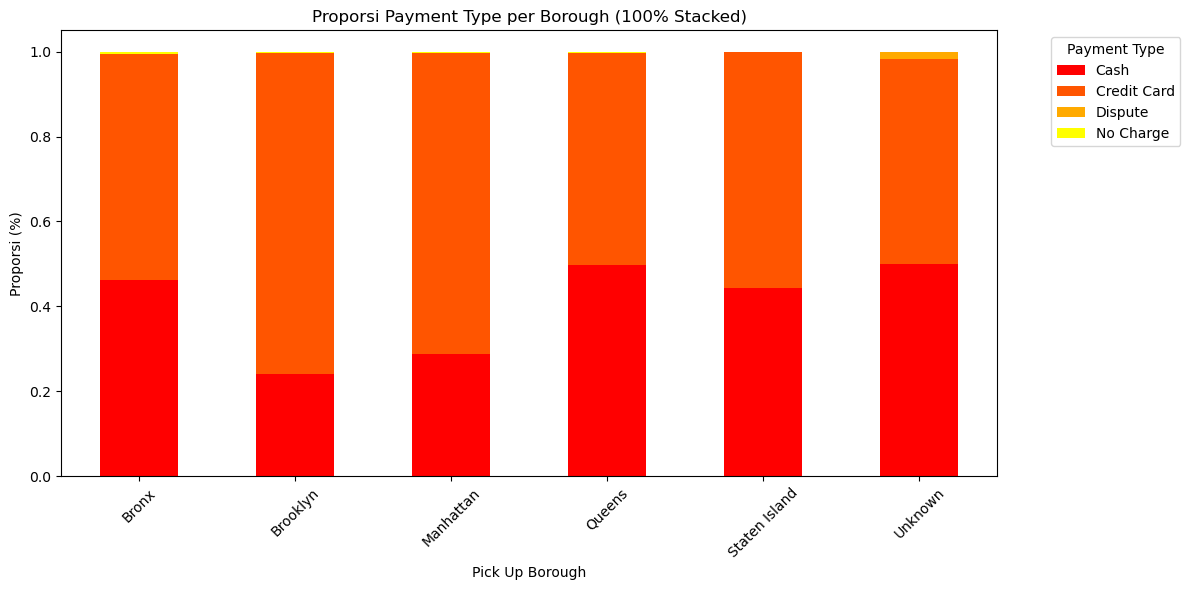

In [134]:

payment_pct = payment_br.div(payment_br.sum(axis=1), axis=0)

payment_pct.plot(kind='bar', stacked=True, figsize=(12,6), colormap='autumn')

plt.title("Proporsi Payment Type per Borough (100% Stacked)")
plt.xlabel("Pick Up Borough")
plt.ylabel("Proporsi (%)")
plt.xticks(rotation=45)
plt.legend(title="Payment Type", bbox_to_anchor=(1.05, 1))
plt.tight_layout()
plt.show()


In [117]:
avg_tip = (
    df_copy
    .groupby('PUBorough')['tip_amount']
    .mean()
    .reset_index()
    .sort_values(by='tip_amount', ascending=False)
)

print(avg_tip)


       PUBorough  tip_amount
1       Brooklyn    3.015242
2      Manhattan    2.286651
5        Unknown    1.991429
3         Queens    1.644929
4  Staten Island    1.362222
0          Bronx    0.954899


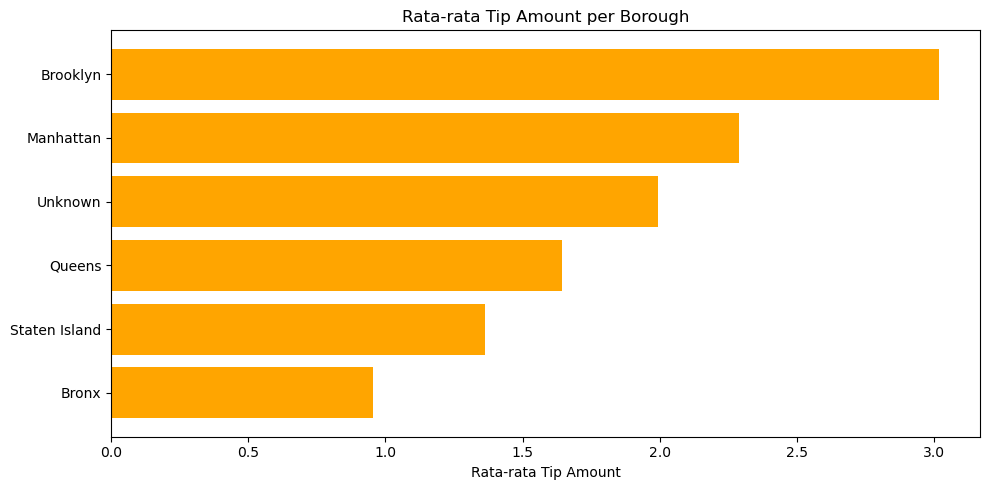

In [ ]:

avg_tip_sorted = avg_tip.sort_values(by='tip_amount', ascending=True)

plt.figure(figsize=(10, 5))
plt.barh(avg_tip_sorted['PUBorough'], avg_tip_sorted['tip_amount'], color='orange')

plt.xlabel("Rata-rata Tip Amount")
plt.title("Rata-rata Tip Amount per Borough")
plt.tight_layout()
plt.show()


In [ ]:
avg_fare = (
    df_copy
    .groupby('PUBorough')['fare_amount']
    .mean()
    .reset_index()
    .sort_values(by='fare_amount', ascending=False)
)

print(avg_fare)


       PUBorough  fare_amount
5        Unknown    38.036786
0          Bronx    20.775854
1       Brooklyn    20.642824
4  Staten Island    19.244444
3         Queens    17.516222
2      Manhattan    14.955184


In [126]:
# Uji normalitas D’Agostino-Pearson
stats, pval = normaltest(df_copy['fare_amount'])

print("Statistic:", stats)
print("P-value:", pval)

alpha = 0.05
if pval <= alpha:
    print("Kesimpulan: Distribusi tidak normal (tolak H0)")
else:
    print("Kesimpulan: Distribusi normal (gagal tolak H0)")


Statistic: 79960.00595381742
P-value: 0.0
Kesimpulan: Distribusi tidak normal (tolak H0)


In [131]:
# Pisahkan fare_amount berdasarkan borough
groups_fare = [
    df_copy[df_copy['PUBorough'] == b]['fare_amount']
    for b in df_copy['PUBorough'].unique()
]

# Uji Kruskal–Wallis
stat, p = kruskal(*groups_fare)

print("Hasil Uji Kruskal–Wallis (fare_amount):")
print("Statistic:", stat)
print("P-value:", p)

alpha = 0.05
if p <= alpha:
    print("Kesimpulan: Ada perbedaan signifikan fare_amount antar borough (Tolak H0)")
else:
    print("Kesimpulan: Tidak ada perbedaan signifikan (Gagal tolak H0)")


Hasil Uji Kruskal–Wallis (fare_amount):
Statistic: 1980.3131661856671
P-value: 0.0
Kesimpulan: Ada perbedaan signifikan fare_amount antar borough (Tolak H0)


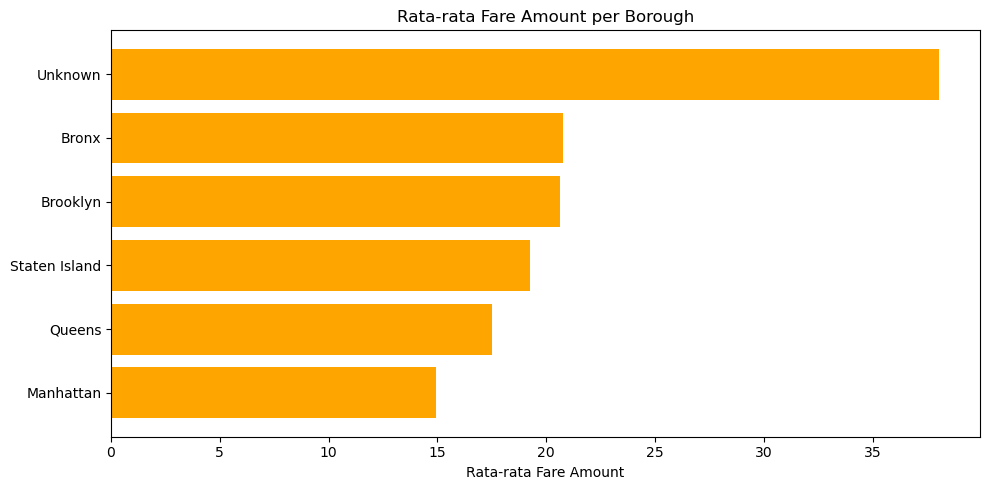

In [133]:
avg_fare_sorted = avg_fare.sort_values(by='fare_amount', ascending=True)

plt.figure(figsize=(10, 5))
plt.barh(avg_fare_sorted['PUBorough'], avg_fare_sorted['fare_amount'], color='orange')

plt.xlabel("Rata-rata Fare Amount")
plt.title("Rata-rata Fare Amount per Borough")
plt.tight_layout()
plt.show()


Berikut hasil temuan Payment Behaviours Analysis berdasarkan Borough:
1. Preferensi Metode Pembayaran Per Borough
Berdasarkan distribusi metode pembayaran, terlihat bahwa setiap borough memiliki karakteristik penggunaan pembayaran yang berbeda. Bronx & Queens memiliki proporsi penggunaan Cash yang lebih tinggi dibandingkan borough lainnya. Ini memunjukan bahwa pengguna di area ini condong menggunakan pembayaran tunai. Manhattan & Brooklyn didominasi dengan pembayaran menggunakan Credit Card sejalan dengan karakteristik di wilayah yang dengan aktivitas bisnis yang tinggi terutama Manhattan. 
2. Perbedaan tip amount berdasatkan Borough
Tabel perhitungan di atas memperlihatkan gap yang cukup signifikan, dengan Brooklyn yang menjadi borough paling dermawan dalam memberikan tip lalu diikut Manhattan, sementara penumpang yang berasal dari Bronx cenderung untuk memberikan tip yang rendah. Ini dapat berkaitan dengan variasi pendapatan, jenis perjalanan & profil penumpang dari masing-masing borough.
3. Pengaruh Borough terhadap fare amount
Berdasarkan hasil pengujian statistik, distribusi data pada fare amount tidak normal dan adanya perbedaan signifikan antar borough. Hal ini mengindikasikan bahwa total fare memang dipengaruhi oleh asal borough. Dari visualisasi yang dihasilkan, Unknown memiliki fare tertinggi, hal tersebut dapat mengartikan bahwa penjemputan berada di luar area NYC atau adanya error pada sistem. Bronx & Brooklyn memiliki fare yang lebih tinggi dibandingkan dengan borough lain yang disebabkan oleh luasnya area pada borough tersebut. Sedangkan Manhattan memiliki fare paling rendah atau dapat diindikasikan bahwa penumpang pada borough tersebut sering melakukan perjalan pendek.

# Conclusions & Recommendations

## Conlusions

Analisis pola customer demand & behaviours taksi di NYC menunjukan adanya perbedaan signifikan antar borough yang dapat dimanfaatkan untuk optimalisasi distribusi armada serta pengembangan layanan. Berikut key takeaways dari analisa di atas:

1. Demand & Geography Pattern
Permintaan tertinggi terkonsentrasi di Manhattan sepanjang hari, dengan puncak tertinggi pada morning rush (07 - 10 AM) dan evening rush (03 - 06 PM) dengan total trip mencapai ~40k. Brooklyn & Queens mengikuti pola yang sama, namun dengan volume yang lebih rendah. Bronx & Staten Island memiliki permintaan kecil dan stabil, menjadikan area dengan prioritas lebih rendah untuk ekspansi armada. 
Berdasarkan pickup zone, East Harlem North menunjukan zona permintaan tertinggi terutama pada jam 08 - 10 AM dan 03 - 06 PM. Terdapat zona-zona dengan minim permintaan yang dapat dipertimbangkan untuk dikurangi alokasi armadanya. Beberapa zona medium, memiliki potensi pertumbuhan jika didasari strategi yang tepat.

2. Trip Characteristic Accross Borough
Bronx, Staten Island dan Brooklyn memiliki perjalan yang relatif panjang (3.5 - 3.8 miles) sejalan dengan luas wilayah dan kepadatan daera tersebut. Manhattan memiliki perjalan terpendek (2.5 miles), konsisten dengan kota yang pada dan destinasi yang berdekata. Nilai Unknown yang sangat tinggi (7.1 miles) mengindikasikan kemungkinan perjalana lintas kota atau kesalahan dalam sistem. Dengan demikian, asal pick up Borough mempengaruhi karakteristik jarak perjalanan yang berdampak pada durasi, tarif dan lokasi armada.

3. Payment Behaviours Insights
Bronx dan Queens menunjukan preferensi yang kuat terhadap pembayaran tunai, sedangkan Brooklyn & Manhattan sangan dominan menggunakan Credit Card, konsisten dengan karakteristik pengguna di area urban bisnis. Brooklyn & Manhattan memberikan tip tertinggi. Pola ini mencerminkan perbedaan profil pelanggan, daya beli, serta karakteristik perjalanan per Borough.



## Recommendations

Berdasarkan analisa yang dilakukan, pola permintaan, karakteristik perjalanan dan perilaku pembayaran sangat berbeda antar Borough. Dengan memahami perbedaan ini, perusahaan dapat mengalokasikan armada secara lebih optimal, menciptakan pengalaman pelanggan yang lebih baik dan memaksimalkan efisiensi operasional serta pendapatan peruhaan. Berikut adalah rekomendasi implementif dan komprehensif untuk menciptakan keadaan tersebut:

1. Fleet Allocation Optimization Based on Demand Patterns.
- Optimalisasi pengembangan armada/hub: pastikan ketersidaan armada yang tinggi pada area Manhattan selama peak hours (07 - 10 AM & 03 - 06 PM).
- Penempatan armada-armada tambahan di zona-zona dengan intensitas tinggi seperti East Harlem North, Midtown and Upper East/West.
- Menempatkan standby fleet di dekat zona komersial/transportasi dan mengatur moderate supply selama peak hours dan menjadikan Brooklyn & Queens sebagai secondary hubs.
- Agar supply tidak berlebihan di Bronx & Staten Island, maka low priority penempatan armada pada area ini perlu dijadwalkan.

2. Service Improvement Strategies Based on Trip Characteristics.
- Fokus pada fast response time & optimalisasi rute pendek di Manhattan.
- Penawaran harga yang didiserfikasi pada penumpang di Brooklyn, Bronx & Staten Island dengan memberikan harga flat atau xtra diskon dengan jarak perjalanan tertentu.
- Penyesuaian harga untuk borough dengan low-density guna menghemat waktu & bahan bakar.
- Mempertimbangkan tarteted promo seperti rush hour discount.

3. Revenue Enhancement Based on Payment Behaviours & Fare Amount
- Memastikan drivers yang ada di Bronx & Queens dilengkapi dengan uang tunai yang cukup.
- Optimalisasi sistem pembayaran digital.
- Penetapan tarif dinamis sesuai jarak dan kepadatan lalu lintas.
- Menempatkan experienced drivers yang memiliki kualitas pelayanan & SOP hospitality tinggi terutama di Manhattan & Brooklyn untuk mendapatkan tip tinggi.

4. Technology Enablement
- Real time monitoring dashboard untuk menampilkan heatmap permintaan per borough per jam.
- Pendistribusian armada secara otomatis (App Based) melalui notifikasi yang didasarkan prediksi permintaan.
- Integrasi traffic data (Google Maps/Apple Maps/Waze) untuk mengoptimalisasi rute.

